## Objective:
To implement the techniques learnt as a part of the course.

## Learning Outcomes:
- Basic understanding of text pre-processing.
- What to do after text pre-processing:
    o Bag of words
    o Tf-idf
- Build the classification model.
- Evaluate the Model.

## Dataset columns
- tweet_id
- airline_sentiment
- airline_sentiment_confidence
- negativereason
- negativereason_confidence
- airline
- airline_sentiment_gold
- name
- negativereason_gold
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location
- user_timezone



## Steps and tasks:
1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)
2. Understand of data-columns: (5 Marks)
    - a. Drop all other columns except “text” and “airline_sentiment”.
    - b. Check the shape of data.
    - c. Print first 5 rows of data.
3. Text pre-processing: Data preparation. (20 Marks)
    - a. Html tag removal.
    - b. Tokenization.
    - c. Remove the numbers.
    - d. Removal of Special Characters and Punctuations.
    - e. Conversion to lowercase.
    - f. Lemmatize or stemming.
    - g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)
    - h. Print first 5 rows of data after pre-processing.
4. Vectorization: (10 Marks)
    - a. Use CountVectorizer.
    - b. Use TfidfVectorizer.
5. Fit and evaluate model using both type of vectorization. (6+6 Marks)
6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

## 1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)

### Import the libraries

In [157]:
#!pip install contractions

In [158]:
import matplotlib.pyplot as plt #import plotting library
import seaborn as sns #import seborn plotting library

import re, string, unicodedata   # Import Regex, string and unicodedata.
import contractions              # Import contractions library.
from bs4 import BeautifulSoup    # Import BeautifulSoup.

import numpy as np               # Import numpy.
import pandas as pd              # Import pandas.
import nltk                      # Import Natural Language Tool-Kit.


from nltk.corpus import stopwords # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer # Import Lemmatizer.

# nltk.download('stopwords')     # Download Stopwords.
# nltk.download('punkt') #Punkt Sentence Tokenizer
# nltk.download('wordnet') #English dictionary

# Import metrics libraries
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

### Load dataset

In [159]:
data_df = pd.read_csv("Tweets.csv")

### Print shape of data, data description

In [160]:
data_df.shape

(14640, 15)

<b>Comment</b>: We can see there are 14640 tweets with 15 features in the data. 

In [161]:
#we will check duplicate records
data_df.duplicated().sum()

36

<b>Comment</b>: Around 36 records are duplicates. We will drop those records. 

In [162]:
data_df.drop_duplicates(inplace=True)

In [163]:
data_df.duplicated().sum()

0

<b>Comment</b>: Dropped the duplicate records.

In [164]:
#we will check if there are any tweet
data_df.duplicated(subset=["tweet_id","airline_sentiment","text"]).sum()

101

<b>Comment</b>: Around 101 tweets have same "tweet_id","airline_sentiment","text"
But some of the other features are not duplicate. We will not drop them as the tweet_id may not be unique id. 

### Print data description

In [165]:
display(data_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
tweet_id,14604.0,5.692157e+17,7.782567e+14,5.675883e+17,5.685581e+17,5.694728e+17,5.698885e+17,5.703106e+17
airline_sentiment_confidence,14604.0,8.999228e-01,1.629550e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10503.0,6.376440e-01,3.303799e-01,0.000000e+00,3.605000e-01,6.705000e-01,1.000000e+00,1.000000e+00
retweet_count,14604.0,8.278554e-02,7.466473e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [166]:
display(data_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14604 non-null  int64  
 1   airline_sentiment             14604 non-null  object 
 2   airline_sentiment_confidence  14604 non-null  float64
 3   negativereason                9159 non-null   object 
 4   negativereason_confidence     10503 non-null  float64
 5   airline                       14604 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14604 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14604 non-null  int64  
 10  text                          14604 non-null  object 
 11  tweet_coord                   1015 non-null   object 
 12  tweet_created                 14604 non-null  object 
 13  t

None

In [167]:
# we will see some of the records
display(data_df.head())

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## 2. Understand of data-columns: (5 Marks)
    - a. Drop all other columns except “text” and “airline_sentiment”.
    - b. Check the shape of data.
    - c. Print first 5 rows of data.

### a. Drop all other columns except “text” and “airline_sentiment”.

In [168]:
data_df1 = data_df[['text', 'airline_sentiment']].copy()

### b. Check the shape of data.

In [169]:
data_df1.shape

(14604, 2)

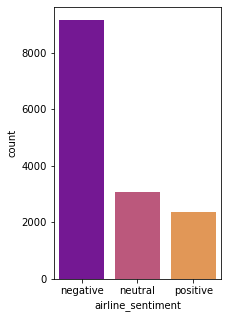

In [170]:
#we will see number of tweets by sentiment
plt.figure(figsize=(3,5))
sns.countplot(data_df1['airline_sentiment'], order =data_df1.airline_sentiment.value_counts().index,palette= 'plasma')
plt.show()

<b>Comment</b>: We can see negative tweets are very high. But we will keep as it is. 

### c. Print first 5 rows of data.

In [171]:
data_df1.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


## 3. Text pre-processing: Data preparation. (20 Marks)
    - a. Html tag removal.
    - b. Tokenization.
    - c. Remove the numbers.
    - d. Removal of Special Characters and Punctuations.
    - e. Conversion to lowercase.
    - f. Lemmatize or stemming.
    - g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)
    - h. Print first 5 rows of data after pre-processing.

### a. Html tag removal.

In [172]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data_df1['text'] = data_df1['text'].apply(lambda x: strip_html(x))
data_df1.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [173]:
#We will perform contraction before tokenization so that we can avoid breaking of words 
#such as  "you've" to "you" and "ve"
#before contraction
data_df1.iloc[1].text

"@VirginAmerica plus you've added commercials to the experience... tacky."

In [174]:
#perform contraction
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data_df1['text'] = data_df1['text'].apply(lambda x: replace_contractions(x))
#After contraction
data_df1.iloc[1].text

'@VirginAmerica plus you have added commercials to the experience... tacky.'

<b>Comment<b/>: We can see "you've" is converted into "you have"

### b. Tokenization.

In [175]:
# Tokenization of data
data_df1['text'] = data_df1.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) 
data_df1.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, com...",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Mu...",neutral
3,"[@, VirginAmerica, it, is, really, aggressive,...",negative
4,"[@, VirginAmerica, and, it, is, a, really, big...",negative


<b>Comment</b>: From the above output, we can see the tweets are broken into words.

### c. Remove the numbers.

In [176]:
#before number removal
data_df1.iloc[10].text

['@',
 'VirginAmerica',
 'did',
 'you',
 'know',
 'that',
 'suicide',
 'is',
 'the',
 'second',
 'leading',
 'because',
 'of',
 'death',
 'among',
 'teens',
 '10-24']

In [177]:
#removing numbers
def remove_numbers(text):
    for count, value in enumerate(text):
        text[count] = re.sub(r'\d+', '', value)
    return text
data_df1['text'] = data_df1['text'].apply(lambda x: remove_numbers(x))
#after number removal
data_df1.iloc[10].text

['@',
 'VirginAmerica',
 'did',
 'you',
 'know',
 'that',
 'suicide',
 'is',
 'the',
 'second',
 'leading',
 'because',
 'of',
 'death',
 'among',
 'teens',
 '-']

<b>Comment</b>: We can see the digits are removed. 

### d. Removal of Special Characters and Punctuations.

In [178]:
#before removal of special characters
data_df1.iloc[6].text

['@',
 'VirginAmerica',
 'yes',
 ',',
 'nearly',
 'every',
 'time',
 'I',
 'fly',
 'VX',
 'this',
 '“',
 'ear',
 'worm',
 '”',
 'will',
 'not',
 'go',
 'away',
 ':',
 ')']

In [179]:
#removing special characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
data_df1['text'] = data_df1['text'].apply(lambda x: remove_non_ascii(x))
#after removal of special characters
data_df1.iloc[6].text

['@',
 'VirginAmerica',
 'yes',
 ',',
 'nearly',
 'every',
 'time',
 'I',
 'fly',
 'VX',
 'this',
 '',
 'ear',
 'worm',
 '',
 'will',
 'not',
 'go',
 'away',
 ':',
 ')']

<b>Comment</b>: We can see special characters(like double quotes) are removed. 

In [180]:
### d. Removal of Punctuations.

In [181]:
#before removal of punctuations
data_df1.iloc[2].text

['@',
 'VirginAmerica',
 'I',
 'did',
 'not',
 'today',
 '...',
 'Must',
 'mean',
 'I',
 'need',
 'to',
 'take',
 'another',
 'trip',
 '!']

In [182]:
##Removing punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

data_df1['text'] = data_df1['text'].apply(lambda x: remove_punctuation(x))
#after removal of punctuations
data_df1.iloc[2].text

['VirginAmerica',
 'I',
 'did',
 'not',
 'today',
 'Must',
 'mean',
 'I',
 'need',
 'to',
 'take',
 'another',
 'trip']

<b>Comment</b>: We can see Punctuations characters(like !) are removed.

### e. Conversion to lowercase.

In [183]:
#before conversion to lowercase
data_df1.iloc[2].text

['VirginAmerica',
 'I',
 'did',
 'not',
 'today',
 'Must',
 'mean',
 'I',
 'need',
 'to',
 'take',
 'another',
 'trip']

In [184]:
#converting to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words
data_df1['text'] = data_df1['text'].apply(lambda x: to_lowercase(x))
#After conversion to lowercase
data_df1.iloc[2].text

['virginamerica',
 'i',
 'did',
 'not',
 'today',
 'must',
 'mean',
 'i',
 'need',
 'to',
 'take',
 'another',
 'trip']

<b>Comment</b>: We can see all characters are converted to lower case.

### f. Lemmatize or stemming.

In [185]:
#before lemmatize
data_df1.iloc[1].text

['virginamerica',
 'plus',
 'you',
 'have',
 'added',
 'commercials',
 'to',
 'the',
 'experience',
 'tacky']

In [186]:
#we will lemmatize using WordNet
lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words
data_df1['text'] = data_df1['text'].apply(lambda x: lemmatize_list(x))
#After lemmatize
data_df1.iloc[1].text

['virginamerica',
 'plus',
 'you',
 'have',
 'add',
 'commercials',
 'to',
 'the',
 'experience',
 'tacky']

<b>Comment</b>: We can see "added" is converted to "add"

### g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)

In [187]:
data_df2 = data_df1.copy()
def append_words(words):
    text_str = ""
    for word in words:
        text_str+= word + " "
    return text_str
data_df2['text'] = data_df1['text'].apply(lambda x: append_words(x))

### h. Print first 5 rows of data after pre-processing.

In [188]:
data_df2.head(5)

,text,airline_sentiment
0,virginamerica what dhepburn say,neutral
1,virginamerica plus you have add commercials to...,positive
2,virginamerica i do not today must mean i need ...,neutral
3,virginamerica it be really aggressive to blast...,negative
4,virginamerica and it be a really big bad thing...,negative


<b>Comment</b>: We can see the words are concatenated

## 4. Vectorization: (10 Marks)
- a. Use CountVectorizer.
- b. Use TfidfVectorizer.

### 4a. Use CountVectorizer.

In [189]:
# Import the Count Vectorization library to Convert text data to numbers.
from sklearn.feature_extraction.text import CountVectorizer

# Keep only 3000 features as number of features will increase the processing time.
# we will build the vector using uni,bi and trigrams
vectorizer_count = CountVectorizer(max_features=3000,ngram_range=(1,3))   
data_features_count = vectorizer_count.fit_transform(data_df2['text'])

# Convert the data features to array.
data_feature_count = data_features_count.toarray()  

In [190]:
print(vectorizer_count.vocabulary_)

{'virginamerica': 2728, 'what': 2789, 'say': 2000, 'plus': 1885, 'you': 2915, 'have': 1091, 'add': 22, 'to': 2414, 'the': 2271, 'experience': 791, 'you have': 2945, 'to the': 2512, 'do': 700, 'not': 1647, 'today': 2525, 'must': 1559, 'mean': 1503, 'need': 1604, 'take': 2209, 'another': 169, 'trip': 2548, 'do not': 710, 'need to': 1606, 'to take': 2507, 'it': 1282, 'be': 271, 'really': 1933, 'entertainment': 768, 'in': 1241, 'your': 2977, 'face': 799, 'they': 2353, 'little': 1427, 'it be': 1285, 'be really': 357, 'in your': 1262, 'they have': 2361, 'and': 125, 'big': 423, 'bad': 253, 'thing': 2365, 'about': 4, 'and it': 138, 'about it': 5, 'and it be': 139, 'seriously': 2039, 'would': 2891, 'pay': 1845, 'flight': 847, 'for': 935, 'seat': 2014, 'that': 2250, 'this': 2372, 'play': 1879, 'only': 1792, 'fly': 915, 'flight for': 872, 'that do': 2256, 'not have': 1671, 'the only': 2311, 'that do not': 2257, 'do not have': 714, 'yes': 2911, 'every': 778, 'time': 2401, 'will': 2838, 'go': 1046,

<b>Comment</b>: We can see only uni,bi and trigrams are selected.

In [191]:
count_vect_df = pd.DataFrame(data_features_count.todense(), columns=vectorizer_count.get_feature_names())
count_vect_df.head()

,aa,able,able to,able to get,about,about it,about my,about the,about to,about your,...,your phone,your plan,your service,your site,your staff,your system,your team,your website,yr,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
data_features_count.shape

(14604, 3000)

<b>Comment</b>: We can see only 3000 features are selected

In [193]:
print(data_feature_count[3])

[0 0 0 ... 0 0 0]


In [194]:
labels = data_df2['airline_sentiment']
#labels = labels.astype('int')

In [195]:
labels

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14604, dtype: object

In [196]:
labels.value_counts()

negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64

### 4b. Using TfidfVectorizer.

In [197]:
# Import TfidfVectorizer library to convert text data to numbers.
from sklearn.feature_extraction.text import TfidfVectorizer

# Keep only 3000 features as number of features will increase the processing time.
# we will build the vector using uni,bi and trigrams
vectorizer_tfid = TfidfVectorizer(max_features=3000, ngram_range=(1,3))
data_features_tfid = vectorizer_tfid.fit_transform(data_df2['text'])

# Convert the data features to array.
data_feature_tfid = data_features_tfid.toarray()

data_feature_tfid.shape

(14604, 3000)

<b>Comment</b>: We can see only 3000 features are selected.

In [198]:
data_feature_tfid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [199]:
tfid_vect_df = pd.DataFrame(data_features_tfid.todense(), columns=vectorizer_tfid.get_feature_names())
tfid_vect_df.head()

,aa,able,able to,able to get,about,about it,about my,about the,about to,about your,...,your phone,your plan,your service,your site,your staff,your system,your team,your website,yr,zero
0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.216512,0.35802,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
tfid_vect_df.describe()

,aa,able,able to,able to get,about,about it,about my,about the,about to,about your,...,your phone,your plan,your service,your site,your staff,your system,your team,your website,yr,zero
count,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,...,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000
mean,0.004075,0.001705,0.001584,0.000450,0.006385,0.000551,0.000749,0.001052,0.000442,0.000423,...,0.000680,0.000424,0.000574,0.000566,0.000836,0.000367,0.000478,0.001085,0.000666,0.000718
std,0.032471,0.019364,0.018253,0.010535,0.035866,0.012989,0.014064,0.017083,0.011074,0.011379,...,0.014623,0.011296,0.013254,0.012674,0.015108,0.010346,0.012477,0.017159,0.014334,0.014749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.625821,0.574097,0.345431,0.291358,0.511686,0.419477,0.491408,0.495500,0.399889,0.462620,...,0.514988,0.372755,0.567015,0.410733,0.446986,0.422895,0.605091,0.467763,0.575167,0.535796


## 5. Fit and evaluate model using both type of vectorization. (6+6 Marks)
<b>Using CountVectorizer</b>

In [201]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(data_feature_count, labels, test_size=0.3, random_state=42)

In [202]:
y_train_count.value_counts()

negative    6363
neutral     2206
positive    1653
Name: airline_sentiment, dtype: int64

In [203]:
y_test_count.value_counts()

negative    2796
neutral      885
positive     701
Name: airline_sentiment, dtype: int64

In [204]:
## Using Random Forest to build model for the classification of tweets.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#we will build 200 trees.
forest_count = RandomForestClassifier(n_estimators=200, n_jobs=4, random_state=21)

forest_count = forest_count.fit(X_train_count, y_train_count)

print(forest_count)

print(np.mean(cross_val_score(forest_count, data_features_count, labels, cv=5)))

RandomForestClassifier(n_estimators=200, n_jobs=4, random_state=21)
0.7269231544835931


In [205]:
# Predict the result for test data using the model built above.
result_count = forest_count.predict(X_test_count)

In [206]:
result_count.shape

(4382,)

In [207]:
acc_RF_count = accuracy_score(y_test_count, result_count)
acc_RF_count

0.7788680967594706

[[2640  102   54]
 [ 444  382   59]
 [ 201  109  391]]


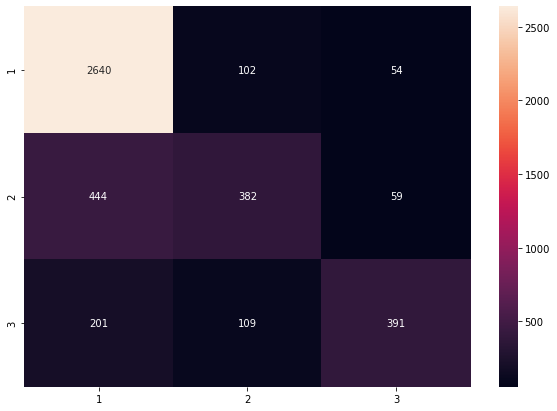

In [208]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

conf_mat_count = confusion_matrix(y_test_count, result_count)

print(conf_mat_count)

df_cm_count = pd.DataFrame(conf_mat_count, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_count, annot=True, fmt='g')


<b>Comment</b>: The accuracy score is 77.88% for CountVectorizer data using Random Forest Classifier.

## 5. Fit and evaluate model using both type of vectorization. (6+6 Marks)
<b>Using TfidfVectorizer</b>

In [209]:
X_train_tfid, X_test_tfid, y_train_tfid, y_test_tfid = train_test_split(data_feature_tfid, labels, test_size=0.3, random_state=21)

In [210]:
y_train_tfid.value_counts()

negative    6392
neutral     2185
positive    1645
Name: airline_sentiment, dtype: int64

In [211]:
y_test_tfid.value_counts()

negative    2767
neutral      906
positive     709
Name: airline_sentiment, dtype: int64

In [212]:
# Using Random Forest to build model for the classification of tweets.
# Also calculating the cross validation score.

#we will build 200 trees.
forest_tfid = RandomForestClassifier(n_estimators=200, n_jobs=4, random_state=21)

forest_tfid = forest_tfid.fit(X_train_tfid, y_train_tfid)

print(forest_tfid)

print(np.mean(cross_val_score(forest_tfid, data_feature_tfid, labels, cv=5)))

RandomForestClassifier(n_estimators=200, n_jobs=4, random_state=21)
0.7150779429075237


In [213]:
result_rf_tfid = forest_tfid.predict(X_test_tfid)
result_rf_tfid.shape

(4382,)

In [214]:
acc_RF_tfid = accuracy_score(y_test_tfid, result_rf_tfid)
acc_RF_tfid

0.7722501141031493

[[2642   82   43]
 [ 461  375   70]
 [ 249   93  367]]


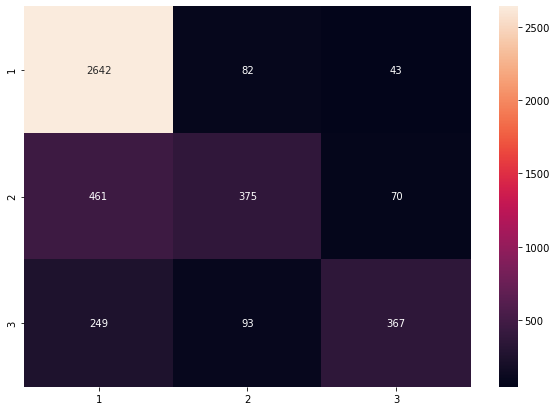

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat_rf_tfid = confusion_matrix(y_test_tfid, result_rf_tfid)

print(conf_mat_rf_tfid)

df_cm_rf_tfid = pd.DataFrame(conf_mat_rf_tfid, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_rf_tfid, annot=True, fmt='g')

<b>Comment</b>: The accuracy score is 77.22% for TfidfVectorizer data using Random Forest Classifier.

## 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

<b>Summary:</b>

- We imported all the required NLP libraries like nltk, re, BeautifulSoup,contractions etc.
- We used dataset which has tweets in text format and their airline_sentiment value which are either Positive, Neutral or Negative.
- The goal was to build a model for tweet-classification i.e. classify the tweet text into either positive, negative, or neutral tweets.
- We pre-processed the data using variuos techniques like html tag removal, tokenization, number and special character removal,lowercase conversion and lematization. There were some duplicates in the data which were removed during pre processing. In addition we performed contraction before lemmatization so that words like "you've" are properly lemmatized.
- The pre-precessed data is converted to numbers, so that we can feed the data in the model. we used 2 techniques to convert namely CountVectorizer and TfidfVectorizer. We used only the top 3000 high frequency grams which are either Uni, Bi or Trigrams. 
- After building the classification model using RandomForestClassifier using 200 trees, we trained and predicted for both CountVectorizer and TfidfVectorizer data. 

    - Vectorization Type Test_Data_Accuracy
    - CountVectorizer:        77.88%
    - TfidfVectorizer:        77.22%

- We can see accuracy of CountVectorizer is slightly better than TfidfVectorizer

### SVM Classifier

In [217]:
from sklearn.svm import SVC

In [220]:
# Using Random Forest to build model for the classification of tweets.
# Also calculating the cross validation score.

svm_tfid = SVC( random_state=21)

svm_tfid = svm_tfid.fit(X_train_tfid, y_train_tfid)

print(svm_tfid)

print(np.mean(cross_val_score(svm_tfid, data_feature_tfid, labels, cv=5)))

SVC(random_state=21)
0.7634197567918661


In [223]:
result_svm_tfid = svm_tfid.predict(X_test_tfid)
result_svm_tfid.shape

(4382,)

In [224]:
acc_svm_tfid = accuracy_score(y_test_tfid, result_svm_tfid)
acc_svm_tfid

0.8003194888178914

### naive_bayes

In [229]:
from sklearn.naive_bayes import MultinomialNB
gnb_tfid = MultinomialNB()
gnb_tfid = gnb_tfid.fit(X_train_tfid, y_train_tfid)

print(gnb_tfid)

print(np.mean(cross_val_score(gnb_tfid, data_feature_tfid, labels, cv=5)))


MultinomialNB()
0.7439049302875258


In [230]:
result_gnb_tfid = gnb_tfid.predict(X_test_tfid)
result_gnb_tfid.shape

(4382,)

In [231]:
acc_gnb_tfid = accuracy_score(y_test_tfid, result_gnb_tfid)
acc_gnb_tfid

0.7692834322227293